# What is Topic Modeling? An Introduction With Examples

Datacamp [Topic Modeling](https://www.datacamp.com/tutorial/what-is-topic-modeling)


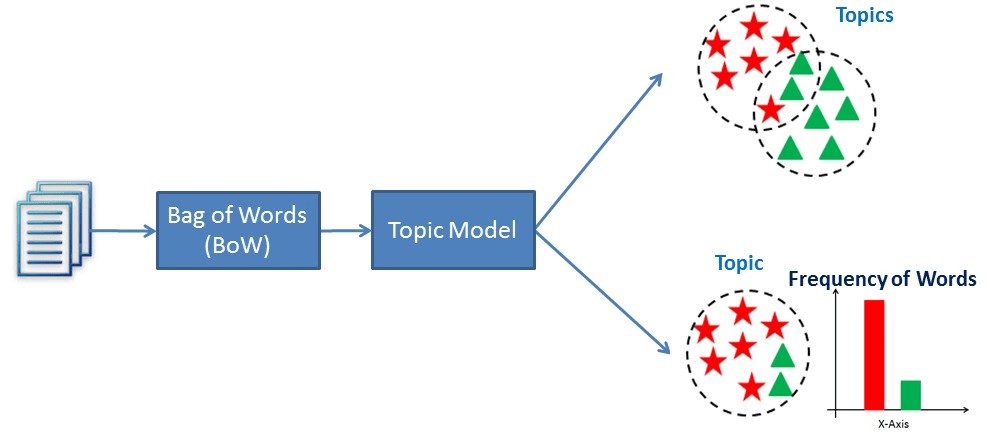

## Data preparation

In [1]:
# Creating example documents
doc_1 = "A whopping 96.5 percent of water on Earth is in our oceans, covering 71 percent of the surface of our planet. And at any given time, about 0.001 percent is floating above us in the atmosphere. If all of that water fell as rain at once, the whole planet would get about 1 inch of rain."

doc_2 = "One-third of your life is spent sleeping. Sleeping 7-9 hours each night should help your body heal itself, activate the immune system, and give your heart a break. Beyond that--sleep experts are still trying to learn more about what happens once we fall asleep."

doc_3 = "A newborn baby is 78 percent water. Adults are 55-60 percent water. Water is involved in just about everything our body does."

doc_4 = "While still in high school, a student went 264.4 hours without sleep, for which he won first place in the 10th Annual Great San Diego Science Fair in 1964."

doc_5 = "We experience water in all three states: solid ice, liquid water, and gas water vapor."

# Create corpus
corpus = [doc_1, doc_2, doc_3, doc_4, doc_5]

## Preprocessing

In [4]:
import nltk

#nltk.download('stopwords')
#nltk.download('wordnet')  
#nltk.download('omw-1.4')  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\earojaso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\earojaso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\earojaso\AppData\Roaming\nltk_data...


True

The next step is cleaning the text:

In [3]:
# Code source: https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

import string

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# remove stopwords, punctuation, and normalize the corpus
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]

In [6]:
print(clean_corpus)

[['whopping', '965', 'percent', 'water', 'earth', 'ocean', 'covering', '71', 'percent', 'surface', 'planet', 'given', 'time', '0001', 'percent', 'floating', 'u', 'atmosphere', 'water', 'fell', 'rain', 'once', 'whole', 'planet', 'would', 'get', '1', 'inch', 'rain'], ['onethird', 'life', 'spent', 'sleeping', 'sleeping', '79', 'hour', 'night', 'help', 'body', 'heal', 'itself', 'activate', 'immune', 'system', 'give', 'heart', 'break', 'beyond', 'thatsleep', 'expert', 'still', 'trying', 'learn', 'happens', 'fall', 'asleep'], ['newborn', 'baby', '78', 'percent', 'water', 'adult', '5560', 'percent', 'water', 'water', 'involved', 'everything', 'body', 'doe'], ['still', 'high', 'school', 'student', 'went', '2644', 'hour', 'without', 'sleep', 'first', 'place', '10th', 'annual', 'great', 'san', 'diego', 'science', 'fair', '1964'], ['experience', 'water', 'three', 'state', 'solid', 'ice', 'liquid', 'water', 'gas', 'water', 'vapor']]


Before we can use this data as input to a LDA or LSA model, it must be converted to a term-document matrix. A term-document matrix is merely a mathematical representation of a set of documents and the terms contained within them.

To do this in Python, we’re going to leverage the [Gensim - course](https://campus.datacamp.com/courses/introduction-to-natural-language-processing-in-python/simple-topic-identification?ex=7) library.

### Creating a gensim corpus

In [7]:
from gensim import corpora

# Creating document-term matrix 
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

In [11]:
print(doc_term_matrix[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1)]


## Modeling

### The first model we’ll use in LSA:

***`Note`***. This outputs the topics (each line) with individual topic terms (terms) and their weights.

In [12]:
from gensim.models import LsiModel

# LSA model
lsa = LsiModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# LSA model
print(lsa.print_topics(num_topics=3, num_words=3))

"""
[
(0, '0.555*"water" + 0.489*"percent" + 0.239*"planet"'), 
(1, '0.361*"sleeping" + 0.215*"hour" + 0.215*"still"'), 
(2, '-0.562*"water" + 0.231*"rain" + 0.231*"planet"')
]
"""

[(0, '0.555*"water" + 0.489*"percent" + 0.239*"rain"'), (1, '-0.361*"sleeping" + -0.215*"still" + -0.215*"hour"'), (2, '-0.562*"water" + 0.231*"rain" + 0.231*"planet"')]


'\n[\n(0, \'0.555*"water" + 0.489*"percent" + 0.239*"planet"\'), \n(1, \'0.361*"sleeping" + 0.215*"hour" + 0.215*"still"\'), \n(2, \'-0.562*"water" + 0.231*"rain" + 0.231*"planet"\')\n]\n'

### Let’s try it with LDA:

In [13]:
from gensim.models import LdaModel

# LDA model
lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# Results
print(lda.print_topics(num_topics=3, num_words=3))

"""
[
(0, '0.071*"water" + 0.025*"state" + 0.025*"three"'), 
(1, '0.030*"still" + 0.028*"hour" + 0.026*"sleeping"'), 
(2, '0.073*"percent" + 0.069*"water" + 0.031*"rain"')
]
"""

[(0, '0.054*"water" + 0.030*"sleeping" + 0.022*"ice"'), (1, '0.066*"water" + 0.066*"percent" + 0.029*"planet"'), (2, '0.027*"hour" + 0.026*"still" + 0.021*"sleeping"')]


'\n[\n(0, \'0.071*"water" + 0.025*"state" + 0.025*"three"\'), \n(1, \'0.030*"still" + 0.028*"hour" + 0.026*"sleeping"\'), \n(2, \'0.073*"percent" + 0.069*"water" + 0.031*"rain"\')\n]\n'

## Topic Modeling vs Other Techniques

Reference [Topic modeling vs](https://www.datacamp.com/tutorial/what-is-topic-modeling/#:~:text=Topic%20Modeling%20vs%20Other%20Techniques)


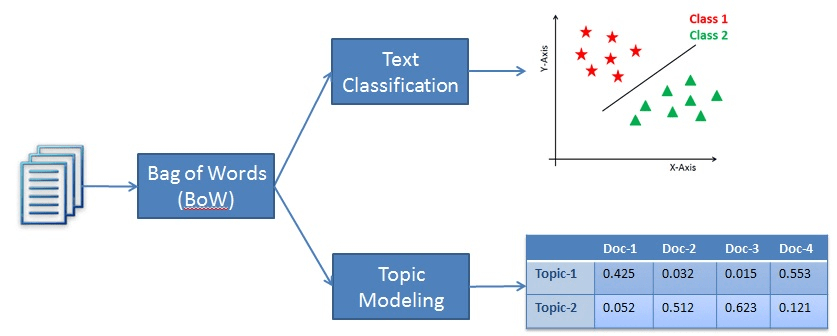